In [1]:

%matplotlib inline

import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

Q = st.norm.sf
Qchi2 = st.chi2.sf

# F4B101 (TP1) : Détection quadratique d'un signal aléatoire gaussien dans un bruit blanc gaussien
Guillaume Ansel (guillaume.ansel@imt-atlantique.fr)

10 octobre 2018

Soit un vecteur aléatoire $X$ de dimension $N$ obéissant aux hypothèses suivantes :
$$\begin{cases}\mathcal{H}_0 : & X = B \\ \mathcal{H}_1 : & X = S + B \end{cases}$$
où $S=(S_1,...,S_N)^T$ est un vecteur aléatoire gaussien de densité :
$$\forall s=(s_1,...,s_N)^T, f_S(s) = \frac{1}{(2\pi)^{N/2}|V_S|^{1/2}}\exp\left(-\frac{s^T 
V_S^{-1}s}{2}\right) \text{ avec } V_S=\mathbb{E}[SS^T]$$
et où $B = (B_1, ..., B_N)^T$ est un vecteur aléatoire gaussien de densité :
$$\forall b=(b_1,...,b_N)^T, f_B(b) = \frac{1}{(2\pi)^{N/2}|V_B|^{1/2}}\exp\left(-\frac{b^T 
V_B^{-1}b}{2}\right) \text{ avec } V_B=\mathbb{E}[BB^T]$$
On suppose les deux hypothèses équiprobables et l'indépendance de $S$ et $B$.

## 1)
On suppose $N=1$. On note $\sigma_S^2$ et $\sigma_B^2$ les variances respectives de $S$ et $B$.  
Calculer le test MPE (Minimum de Probabilité d'Erreur) et exprimer la probabilité d'erreur en fonction de :
$$Q(x) = \frac{1}{\sqrt{2\pi}} \int_x^\infty \exp\left(-\frac{t^2}{2}\right)\mathrm{d}t$$
Comparer les taux d'erreur obtenus par simulation à la probabilité d'erreur théorique que vous avez calculée.

Test MPE : $$\forall x \in\mathbb{R},\mathcal{T}_{MPE}(x) =\begin{cases}\mathcal{H_1} 
& \text{si } x^2>\lambda^2\\\mathcal{H_0} & \text{sinon}\end{cases} \text{ avec } \lambda^2=\sigma_B^2\frac{\rho+1}{\rho}\ln(\rho+1)$$

Probabilité d'erreur de ce test : $$P_E = \frac{1}{2} + Q\left(\sqrt{\frac{\rho+1}{\rho}\ln(\rho+1)}\right) - Q\left(\sqrt{\frac{\ln(\rho+1)}{\rho}}\right)$$

In [2]:
C_POINTS = 1000000  # Nombre de points pour la simulation
C_VAR_B = 1  # Variance B
C_VAR_S = 5  # Variance S

C_P_H0 = 0.5  # Probabilité de l'hypothèse H0 : X = B

C_RHO = C_VAR_S / C_VAR_B

# Seuil de décision (lambda^2)
C_THRESHOLD = C_VAR_B * (C_RHO + 1) / C_RHO * np.log(C_RHO + 1)

# Génération des hypothèses pour chaque point
# H0 est représentée par 0, H1 est représentée par 1
v_h = np.random.rand(1, C_POINTS) < C_P_H0
# Génération des observations
v_b = np.sqrt(C_VAR_B) * np.random.randn(1, C_POINTS)
v_s = np.sqrt(C_VAR_S) * np.random.randn(1, C_POINTS)
v_x = v_b + v_h * v_s
# Pour H1 : h = 0 -> x = b
# Pour H2 : h = 1 -> x = b + s

# Décisions
v_d = (v_x ** 2) > C_THRESHOLD

# Estimation probabilité d'erreur
d_pe_mes = np.mean(v_d != v_h)
print('Probabilité d\'erreur mesurée : {}'.format(d_pe_mes))

# Probabilité d'erreur théorique
d_pe_th = 1/2 + Q(np.sqrt((C_RHO+1)/C_RHO*np.log(C_RHO+1))) - Q(np.sqrt(np.log(C_RHO+1)/C_RHO));
print('Probabilité d\'erreur théorique : {}'.format(d_pe_th))

Probabilité d'erreur mesurée : 0.296642
Probabilité d'erreur théorique : 0.29656828487604725


Tracé de $P_E$ en fonction de $\rho$ : courbe théorique et mesure expérimentale.

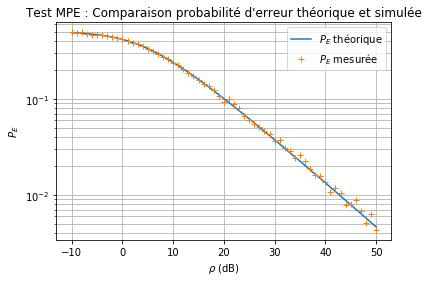

In [3]:
C_POINTS = 10000  # Nombre de points pour chaque simulation
C_VAR_B = 1  # Variance B

V_RHO_DB = np.arange(-10,51)
V_RHO = 10 ** (V_RHO_DB/10)

V_VAR_S = V_RHO * C_VAR_B  # Variance S

C_P_H0 = 0.5  # Probabilité de l'hypothèse H0 : X = B

v_pe_mes = np.zeros_like(V_VAR_S)

for j in range(len(V_VAR_S)):
    d_var_s = V_VAR_S[j];
    d_rho = V_RHO[j];
    
    # Seuil de décision (lambda^2)
    d_thres = C_VAR_B * (d_rho + 1) / d_rho * np.log(d_rho + 1)
    
    v_h = np.random.rand(1, C_POINTS) < C_P_H0
    
    v_b = np.sqrt(C_VAR_B) * np.random.randn(1, C_POINTS)
    v_s = np.sqrt(d_var_s) * np.random.randn(1, C_POINTS)
    v_x = v_b + v_h * v_s
    
    v_d = (v_x ** 2) > d_thres
    
    v_pe_mes[j] = np.mean(v_d != v_h)

# Probabilité d'erreur théorique
v_pe_th = 1/2 + Q(np.sqrt((V_RHO+1)/V_RHO*np.log(V_RHO+1))) - Q(np.sqrt(np.log(V_RHO+1)/V_RHO))

h_fig, h_ax = plt.subplots()
h_ax.semilogy(V_RHO_DB, v_pe_th, label='$P_E$ théorique')
h_ax.semilogy(V_RHO_DB, v_pe_mes, '+', label='$P_E$ mesurée')
h_ax.set_xlabel('$\\rho$ (dB)')
h_ax.set_ylabel('$P_E$')
h_ax.set_title('Test MPE : Comparaison probabilité d\'erreur théorique et simulée')
h_ax.legend()
h_ax.grid(which='both')

## 2)
On suppose que $V_B =\sigma_B^2\mathrm{I}_N$ et $V_S =\sigma_S^2\mathrm{I}_N$ où $\mathrm{I}_N$ est la matrice identité de taille $N$.  
Calculer le test MPE et sa probabilité d’erreur en fonction de :
$$Q_{\chi_N^2}(x) = \int_x^\infty f_{\chi_N^2}(t) \mathrm{d}t$$
où $f_{\chi_N^2}$ est la densité de probabilité de la loi du $\chi_N^2$ centrée à N degrés de liberté :
$$f_{\chi_N^2}(x) =\begin{cases}\frac{1}{2^{N/2}\Gamma(N/2)}x^{N/2-1}e^{-x/2} 
& \text{ si } x\ge0 \\0 & \text{ sinon}\end{cases}$$
Comparer les taux d’erreur obtenus par simulation à la probabilité d’erreur théorique que vous avez calculée.

Test MPE :
$$\forall x \in\mathbb{R}^N,\mathcal{T}_{MPE}(x) =\begin{cases}\mathcal{H_1} 
& \text{si } \|x\|^2>\mu^2\\\mathcal{H_0} & \text{sinon}\end{cases} \text{ avec } \mu^2 
= N\lambda^2=N\sigma_B^2\frac{\rho+1}{\rho}\ln(\rho+1)$$

Probabilité d'erreur de ce test :
$$P_E = \frac{1}{2}\left(1 + Q_{\chi_N^2}\left(N\frac{\rho+1}{\rho}\ln(\rho+1)\right) - Q_{\chi_N^2}\left(N\frac{\ln(\rho+1)}{\rho}\right)\right)$$

In [5]:
C_DIM = 2  # Nombre de dimensions
C_POINTS = 1000000  # Nombre de points pour la simulation
C_VAR_B = 1  # Variance B
C_VAR_S = 50  # Variance S

C_P_H0 = 0.5  # Probabilité de l'hypothèse H0 : X = B

C_RHO = C_VAR_S / C_VAR_B

# Seuil de décision (mu^2)
C_THRESHOLD = C_DIM * C_VAR_B * (C_RHO + 1) / C_RHO * np.log(C_RHO + 1)

# Génération des hypothèses pour chaque point
# H0 est représentée par 0, H1 est représentée par 1
v_h = np.random.rand(1, C_POINTS) < C_P_H0
# Génération des observations (1 colonne = 1 observation)
m_b = np.sqrt(C_VAR_B) * np.random.randn(C_DIM, C_POINTS)
m_s = np.sqrt(C_VAR_S) * np.random.randn(C_DIM, C_POINTS)
m_x = m_b + v_h * m_s

# Décisions
v_d = np.sum(m_x ** 2, axis=0) > C_THRESHOLD

# Estimation probabilité d'erreur
d_pe_mes = np.mean(v_d != v_h)
print('Probabilité d\'erreur mesurée : {}'.format(d_pe_mes))

# Probabilité d'erreur théorique
d_pe_th = 1/2*(1 + Qchi2(C_DIM * (C_RHO+1)/C_RHO * np.log(C_RHO+1), C_DIM) - Qchi2(C_DIM*np.log(C_RHO + 1)/C_RHO,C_DIM))
print('Probabilité d\'erreur théorique : {}'.format(d_pe_th))

Probabilité d'erreur mesurée : 0.046791
Probabilité d'erreur théorique : 0.0468745772964434


## 3)
En utilisant le lemme d'inversion matriciel :
$$(A+BCD)^{-1} = A^{-1} - A^{-1}B(DA^{-1}B+C^{-1})^{-1}DA^{-1}$$
montrer que le détecteur MPE est obtenu en corrélant $X$ avec $V_S(V_S+\sigma^2\mathrm{\mathbf{I}}_N)^{-1}x$ et en comparant le résultat de la corrélation à un seuil qu'on déterminera.  
Vérifier le résultat par simulation.

Test MPE :
$$\forall x \in\mathbb{R}^N,\mathcal{T}_{MPE}(x) =\begin{cases}\mathcal{H_1} 
& \text{si } x^T(V_S+\sigma_B^2\mathrm{\mathbf{I}}_N)^{-1}V_Sx > \tau'\\\mathcal{H_0} 
& \text{sinon}\end{cases} \text{ avec } \tau'=\sigma_B^2\ln\frac{\det(V_c+\sigma_B^2\mathrm{\mathbf{i}}_N)}{{\sigma_B^2}^N}$$

In [5]:
C_DIM = 2  # Nombre de dimensions
C_POINTS = 1000000  # Nombre de points pour la simulation
C_VAR_B = 1  # Variance B
M_COV_B = C_VAR_B * np.eye(C_DIM)  # Matrice de covariance de B
C_VAR_S = 5  # Variance S
M_COV_S = C_VAR_S * np.eye(C_DIM)  # Matrice de covariance de S

C_P_H0 = 0.5  # Probabilité de l'hypothèse H0 : X = B

C_RHO = C_VAR_S / C_VAR_B

# Seuil de décision (mu^2)
C_THRESHOLD = C_VAR_B * np.log(np.linalg.det(M_COV_S + M_COV_B)/C_VAR_B ** C_DIM)

# Génération des hypothèses pour chaque point
# H0 est représentée par 0, H1 est représentée par 1
v_h = np.random.rand(1, C_POINTS) < C_P_H0
# Génération des observations (1 colonne = 1 observation)
m_b = np.sqrt(C_VAR_B) * np.random.randn(C_DIM, C_POINTS)
m_s = np.sqrt(C_VAR_S) * np.random.randn(C_DIM, C_POINTS)
m_x = m_b + v_h * m_s

# Décisions
v_d = np.sum(m_x * (np.linalg.inv(M_COV_S + M_COV_B) @ M_COV_S @ m_x),axis=0) > C_THRESHOLD

# Estimation probabilité d'erreur
d_pe_mes = np.mean(v_d != v_h)
print('Probabilité d\'erreur mesurée : {}'.format(d_pe_mes))

# Probabilité d'erreur théorique
d_pe_th = 1/2*(1 + Qchi2(C_DIM * (C_RHO+1)/C_RHO * np.log(C_RHO+1), C_DIM) - Qchi2(C_DIM*np.log(C_RHO + 1)/C_RHO,C_DIM))
print('Probabilité d\'erreur théorique : {}'.format(d_pe_th))

Probabilité d'erreur mesurée : 0.208728
Probabilité d'erreur théorique : 0.20882203384517534
